In [1]:
import pandas as pd
import numpy as np

In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [4]:
data = pd.DataFrame(raw['XAU='])

In [5]:
data.rename(columns={'XAU=':'price'},inplace=True)

In [6]:
data['returns'] =np.log(data['price']/data['price'].shift(1))

In [8]:
data['position'] = np.sign(data['returns'])

In [9]:
data['strategy'] = data['position'].shift(1)*data['returns']

<Axes: xlabel='Date'>

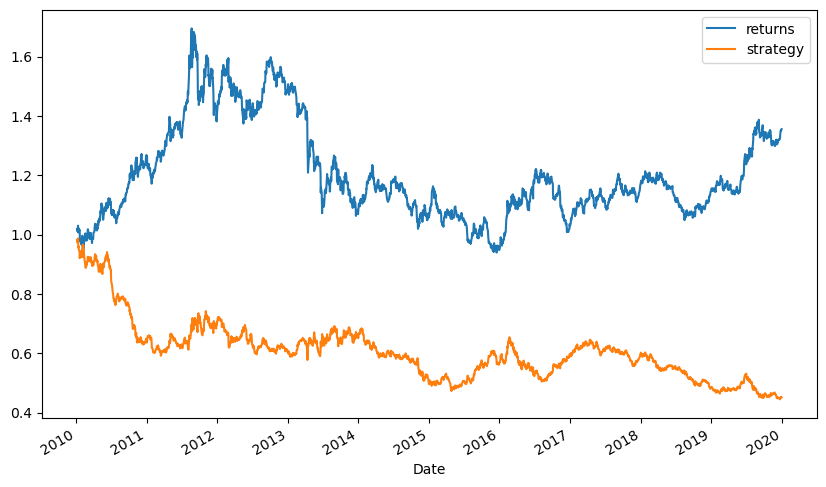

In [11]:
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [12]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [13]:
data['strategy'] = data['position'].shift(1)*data['returns']

<Axes: xlabel='Date'>

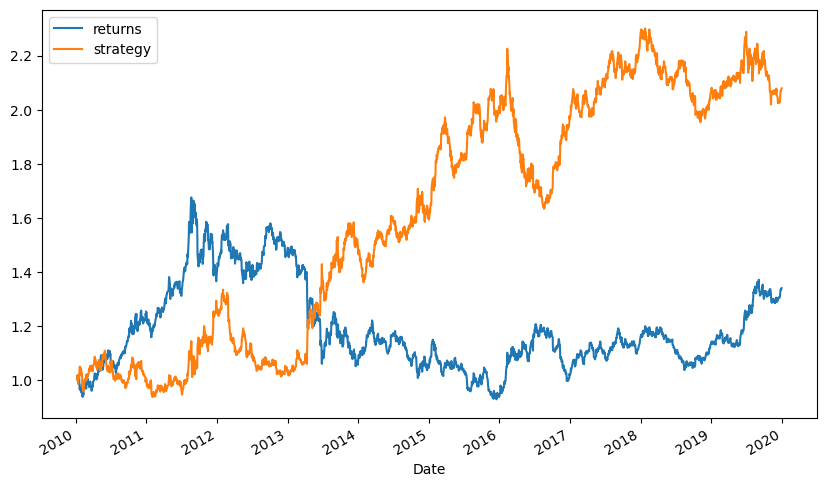

In [16]:
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))